In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/helpers.py /content
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/utils.py /content
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/models.py /content



Mounted at /content/drive


In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from PIL import Image
from helpers import *
import tensorflow as tf
import keras_tuner as kt
import tensorflow.keras as keras
from utils import *
from models import *

# **Building and Testing basic models**

## **Loading the training data**

In [ ]:
# Loaded a set of images
root_dir = "/content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/"
image_dir = root_dir + "images/"
gt_dir = root_dir + "groundtruth/"

imgs = extract_data(image_dir, 100)
gt_imgs = extract_labels(gt_dir, 100)

In [ ]:
print(f"Images shape : {imgs.shape}")
print(f"GT shape : {gt_imgs.shape}")

Images shape : (62500, 16, 16, 3)
GT shape : (62500, 2)


In [ ]:
_,x_tune,_,y_tune = split_data(imgs, gt_imgs, 0.7, seed=345)

## **Fully Connected Neural Network**

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

We use Keras Tuner to find the best fully connected neural network

In [ ]:
tuner = kt.Hyperband(build_model, objective='val_loss', max_epochs = 10, directory='/content/drive/Shareddrives/ML_PROJET2/Project_2', overwrite=True)

In [ ]:
tuner.search(x_tune, y_tune, epochs=30, validation_split=0.15, callbacks=[callback])

Trial 30 Complete [00h 00m 43s]
val_loss: 0.5094950795173645

Best val_loss So Far: 0.4531411826610565
Total elapsed time: 00h 10m 02s


In [ ]:
tuner.results_summary()
# Best Learning Rate : 0.00010723455811960988

Results summary
Results in /content/drive/Shareddrives/ML_PROJET2/Project_2/untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0016 summary
Hyperparameters:
num_layers: 3
units layer 1: 160
lr: 0.00012615635514622766
units layer 2: 288
units layer 3: 96
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.4531411826610565

Trial 0024 summary
Hyperparameters:
num_layers: 3
units layer 1: 480
lr: 0.0002645346700464381
units layer 2: 288
units layer 3: 352
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0021
Score: 0.45334380865097046

Trial 0017 summary
Hyperparameters:
num_layers: 3
units layer 1: 288
lr: 0.00029397733154084595
units layer 2: 96
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
units layer 3: 32
tuner/trial_id: 0013
Score: 0.48596689105033875

Trial 0025 summary
Hyperparameters:
num_layers: 1
units layer 1: 480
lr: 0.0009

In [ ]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.build(input_shape=imgs.shape)
best_model.summary()

**Training the model**

In [ ]:
best_hps = tuner.get_best_hyperparameters(5)
model = build_model(best_hps[0])
model.fit(x_tr, y_tr, batch_size=64, epochs=50, validation_data = (x_te, y_te))

Epoch 1/50
831/831 [==============================] - 9s 8ms/step - loss: 0.5442 - f1_score: 0.4265 - accuracy: 0.7410 - val_loss: 0.5293 - val_f1_score: 0.4254 - val_accuracy: 0.7405
Epoch 2/50
831/831 [==============================] - 7s 8ms/step - loss: 0.4984 - f1_score: 0.5281 - accuracy: 0.7486 - val_loss: 0.4822 - val_f1_score: 0.5906 - val_accuracy: 0.7588
Epoch 3/50
831/831 [==============================] - 6s 7ms/step - loss: 0.4691 - f1_score: 0.6232 - accuracy: 0.7653 - val_loss: 0.4870 - val_f1_score: 0.5818 - val_accuracy: 0.7579
Epoch 4/50
831/831 [==============================] - 8s 9ms/step - loss: 0.4610 - f1_score: 0.6426 - accuracy: 0.7701 - val_loss: 0.4764 - val_f1_score: 0.6060 - val_accuracy: 0.7604
Epoch 5/50
831/831 [==============================] - 5s 6ms/step - loss: 0.4537 - f1_score: 0.6554 - accuracy: 0.7739 - val_loss: 0.4672 - val_f1_score: 0.6915 - val_accuracy: 0.7732
Epoch 6/50
831/831 [==============================] - 6s 7ms/step - loss: 0.4503

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 768)               0         
                                                                 
 dense_12 (Dense)            (None, 160)               123040    
                                                                 
 dense_13 (Dense)            (None, 288)               46368     
                                                                 
 dense_14 (Dense)            (None, 96)                27744     
                                                                 
 dense_15 (Dense)            (None, 2)                 194       
                                                                 
Total params: 197346 (770.88 KB)
Trainable params: 197346 (770.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Basic Convolutional Neural Network**
We also use the FCNN architecture found before.

In [ ]:
basic_cnn = basic_CNN()

basic_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.00010723455811960988),
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                  metrics=[tf.keras.metrics.F1Score(), 'accuracy'])


### **Training**

In [ ]:
basic_cnn.fit(x_tr, y_tr, batch_size=64, epochs=30, validation_data = (x_te, y_te))

Epoch 1/30
831/831 [==============================] - 54s 63ms/step - loss: 0.5164 - f1_score: 0.5313 - accuracy: 0.7482 - val_loss: 0.5133 - val_f1_score: 0.6234 - val_accuracy: 0.7342
Epoch 2/30
831/831 [==============================] - 57s 68ms/step - loss: 0.4663 - f1_score: 0.6306 - accuracy: 0.7721 - val_loss: 0.4357 - val_f1_score: 0.7036 - val_accuracy: 0.7939
Epoch 3/30
831/831 [==============================] - 52s 63ms/step - loss: 0.4236 - f1_score: 0.7009 - accuracy: 0.7966 - val_loss: 0.4198 - val_f1_score: 0.7264 - val_accuracy: 0.8011
Epoch 4/30
831/831 [==============================] - 52s 63ms/step - loss: 0.4020 - f1_score: 0.7260 - accuracy: 0.8079 - val_loss: 0.4200 - val_f1_score: 0.7503 - val_accuracy: 0.8004
Epoch 5/30
831/831 [==============================] - 53s 64ms/step - loss: 0.3893 - f1_score: 0.7447 - accuracy: 0.8180 - val_loss: 0.3985 - val_f1_score: 0.7229 - val_accuracy: 0.8094
Epoch 6/30
831/831 [==============================] - 53s 63ms/step - 

### **Visualising the predictions of the basic CNN**
This notebook was done before writing the utils and helpers functions for visualising.

In [ ]:
import numpy as np

def get_prediction(img, model):
  IMG_PATCH_SIZE = 16
  IMG_WIDTH = imgs[0].shape[0]
  IMG_HEIGHT = imgs[0].shape[1]
  img_patches = img_crop(img, IMG_PATCH_SIZE, IMG_PATCH_SIZE)
  data = [patch for patch in img_patches]
  data = np.asarray(data)
  pred = model.predict(data)
  img_prediction = label_to_img(
            img.shape[0],
            img.shape[1],
            IMG_PATCH_SIZE,
            IMG_PATCH_SIZE,
            pred,
        )


  return img_prediction


# Get prediction overlaid on the original image for given input file
def get_prediction_with_overlay(filename, image_idx, model):
  imageid = "satImage_%.3d" % image_idx
  image_filename = filename + imageid + ".png"
  img = mpimg.imread(image_filename)

  img_prediction = get_prediction(img, model)
  oimg = make_img_overlay(img, img_prediction)

  return oimg

20/20 [==============================] - 0s 9ms/step


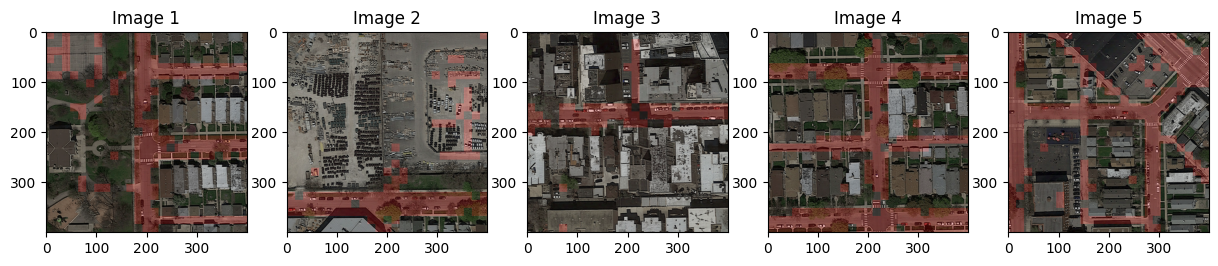

In [ ]:
num_images = 5
fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
for i in range(1,6):
  img_idx = i * 15
  filename = "/content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/images/"
  pred_img = get_prediction_with_overlay(filename, img_idx, basic_cnn)

  axs[i - 1].imshow(pred_img)
  axs[i - 1].set_title(f"Image {i}")

plt.show()


We see that the predictions are pretty good. We guess that it is possible to train a more complex model to get better results.